# **AP157 Image Processing Lab Assignment**
### Module B2: Fourier Transform Applications in Image Processing

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Danac, Nathan Gabriel\
_Student No._: 2021-12517\
_Section_: THY-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Nathan Gabriel C. Danac**

### Grading Information (c/o Instructor)

TOTAL SCORE: **93**/100

Score breakdown:
* Part 1 - 30/30
* Part 2 - 20/20
* Part 3 - 18/20
* Part 4 - 25/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm

from numpy.fft import fft2,ifft2,fftshift,ifftshift
import random

import cv2

#### PART 1 - Apply 2D FFT on simple apertures *(30 points)*

1. [15 pts.] Rectangular apertures with (width, height):
- (50, 20) pixels
- (20, 50) pixels
2. [15 pts.] Circular apertures with radii:
- 5 pixels
- 10 pixels
- 20 pixels

For each aperture type, perform the following steps:

- **Step 1: Define Input Aperture**
  - Generate a 2D array representing a rectangle/circle with the specified size within a square grid of size 128 pixels (representing an optical system, for example).
  
- **Step 2: Compute Fourier Transform**
  - Use the Fast Fourier Transform (FFT) algorithm to compute the Fourier transform of the input aperture.

- **Step 3: Shift the FFT**
  - Shift the zero frequency component of the Fourier transform to the center.

- **Step 4: Visualization (Plotting)**
  - Plot the original aperture.
  - Plot the magnitude of the shifted Fourier transform.
  - Plot the log-scaled magnitude of the shifted Fourier transform.
  - Add colorbars to the plots for reference.

- **Step 5: Display**
  - Display the plots in a single figure with three subplots (original aperture, FFT magnitude, log-scaled FFT magnitude).



Define the functions `gen_rect` with inputs width `w`, height `h`, and size `size`, and `gen_circ` with inputs radius `r` and size `size`

Both output a `size` x `size` matrix `grid` containing the respective shape.

In [2]:
def gen_rect(w, h, size):
  grid = np.zeros((size, size)) #Generate a blank canvas

  #Center the rectangle
  xi = int((size - h)/2)
  yi = int((size - w)/2)
  xf = xi + h
  yf = yi + w

  grid[xi:xf, yi:yf] = 1 #Draw the rectangle

  return grid

def gen_circ(r, size):
  grid = np.zeros((size, size)) #Generate a blank canvas

  x, y = np.ogrid[:size, :size] #Find the coordinates of each element

  #Find the center
  cx = int(size/2)
  cy = int(size/2)
  d = np.sqrt((x - cx)**2 + (y - cy)**2) #Compute the distance of each element to the center

  grid[(d <= r)] = 1 #If the distance is within the radius, draw, creating the circle

  return grid

Text(0.5, 1.0, 'Rectangular aperture with\n $w = 20$ and $h = 50$')

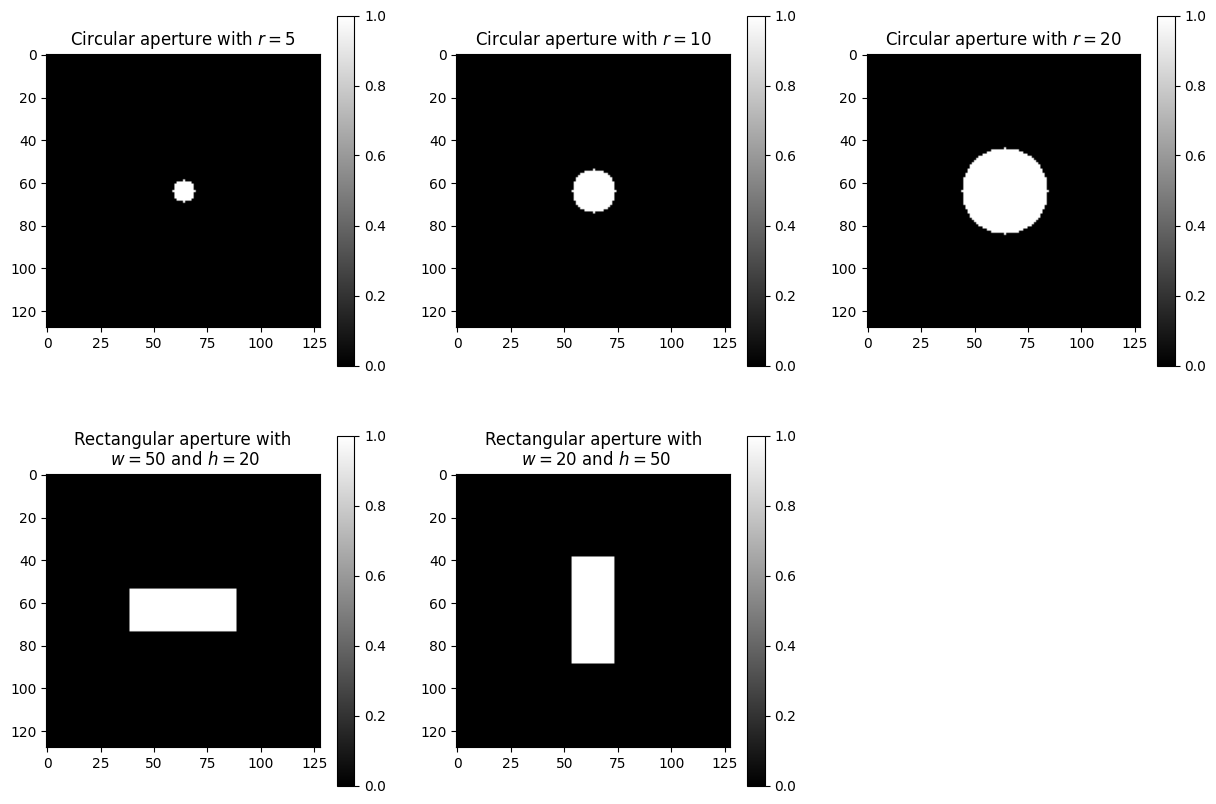

In [3]:
#Generate rectangles
rx = gen_rect(50, 20, 128)
ry = gen_rect(20, 50, 128)
#Generate circles
c5 = gen_circ(5, 128)
c10 = gen_circ(10, 128)
c20 = gen_circ(20, 128)

#Display all apertures
fig = plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow(c5, cmap="gray")
plt.colorbar()
plt.title("Circular aperture with $r = 5$")
plt.subplot(232)
plt.imshow(c10, cmap="gray")
plt.colorbar()
plt.title("Circular aperture with $r = 10$")
plt.subplot(233)
plt.imshow(c20, cmap="gray")
plt.colorbar()
plt.title("Circular aperture with $r = 20$")
plt.subplot(234)
plt.imshow(rx, cmap="gray")
plt.colorbar()
plt.title("Rectangular aperture with\n $w = 50$ and $h = 20$")
plt.subplot(235)
plt.imshow(ry, cmap="gray")
plt.colorbar()
plt.title("Rectangular aperture with\n $w = 20$ and $h = 50$")

Define a function `display_fft` with inputs aperture `aperture` and the title `name`. The function plots the original aperture, its Fourier transform including the shift, and the log-scaled Fourier transform.

In [4]:
def display_fft(aperture, name):
  fft = np.abs(fftshift(fft2(aperture))) + 1

  fig = plt.figure(figsize=(15, 5))
  plt.subplot(131)
  plt.imshow(aperture, cmap="gray")
  plt.title("Aperture")
  plt.colorbar()
  plt.subplot(132)
  plt.imshow(fft, cmap="inferno")
  plt.title("Fourier transform")
  plt.colorbar()
  plt.subplot(133)
  plt.imshow(np.log10(fft), cmap="inferno")
  plt.title("Log-scaled Fourier transform")
  plt.colorbar()
  fig.suptitle(name)

  plt.show()
  return

Run the function for all our apertures

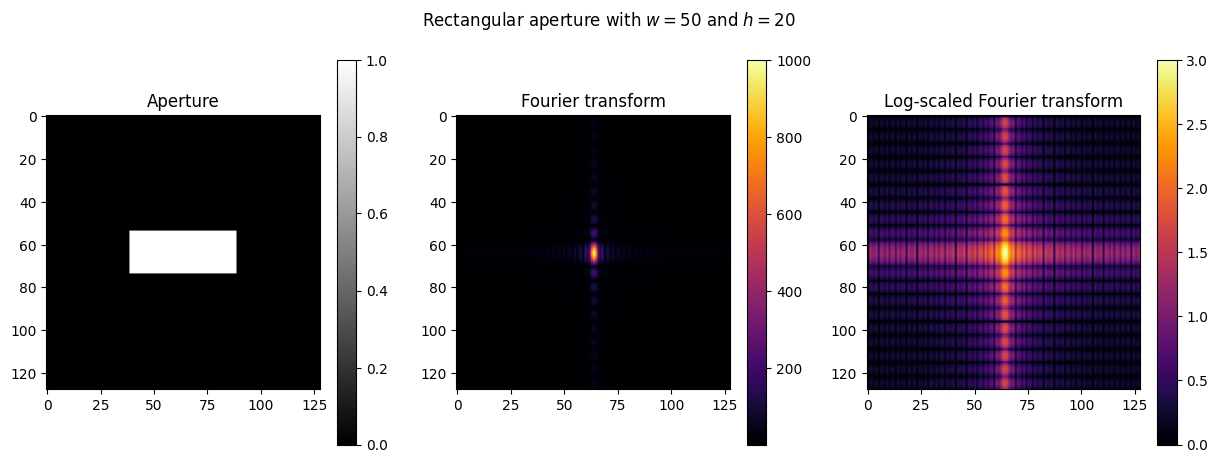

In [5]:
display_fft(rx, "Rectangular aperture with $w = 50$ and $h = 20$")

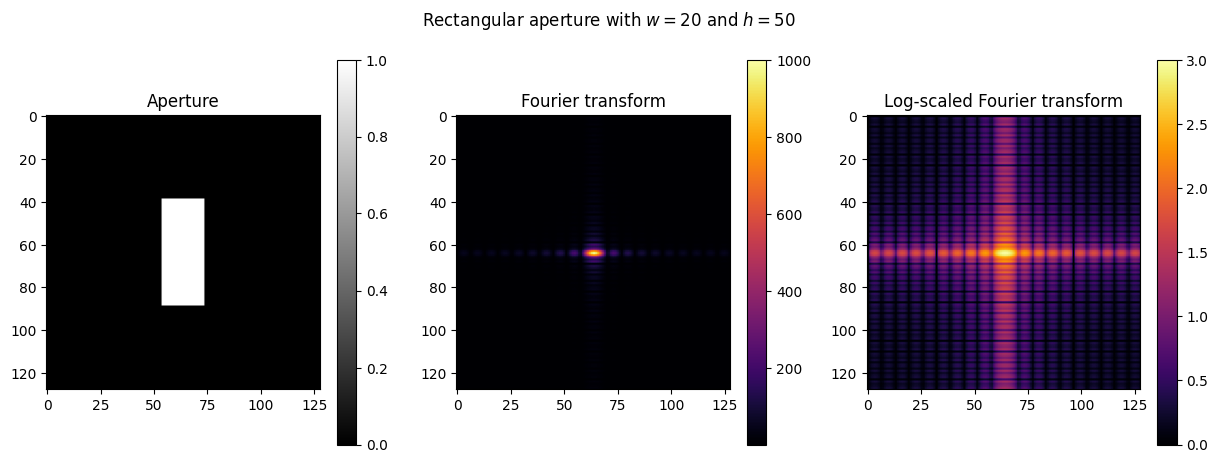

In [6]:
display_fft(ry, "Rectangular aperture with $w = 20$ and $h = 50$")

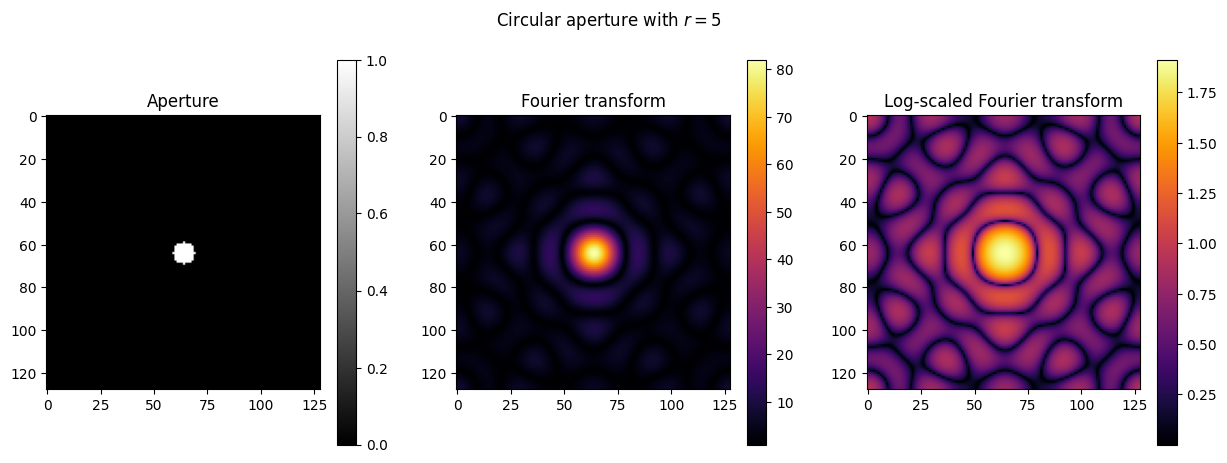

In [7]:
display_fft(c5, "Circular aperture with $r = 5$")

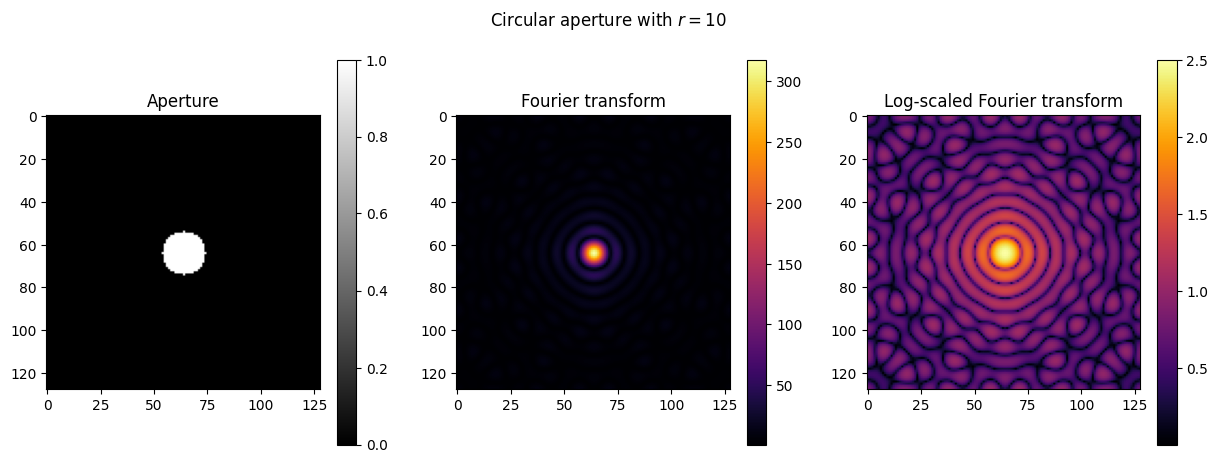

In [8]:
display_fft(c10, "Circular aperture with $r = 10$")

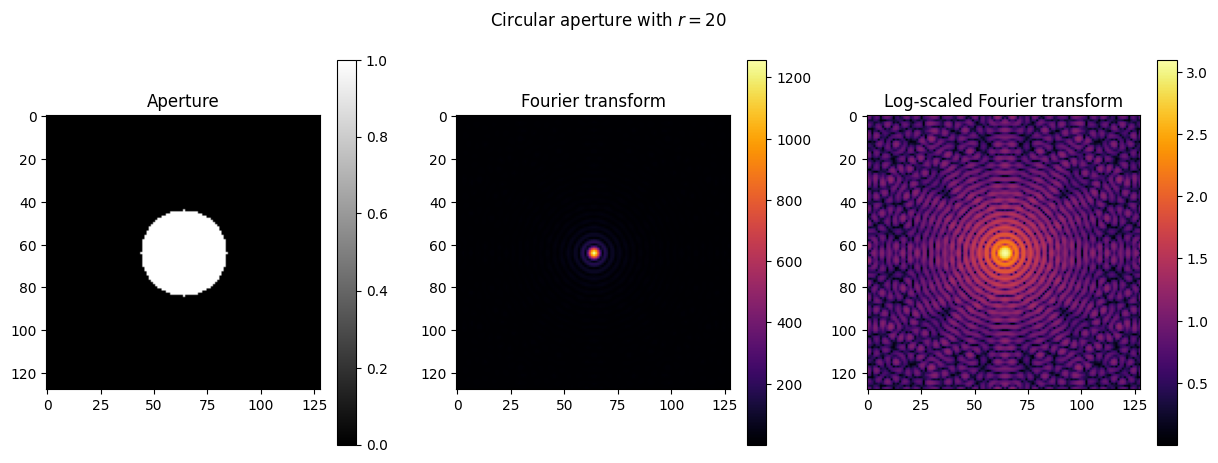

In [9]:
display_fft(c20, "Circular aperture with $r = 20$")

Physically, an aperture is like a lens. It controls the amount of light passing through the lens and thus, the image formed. As more light passes through, more information can be carried, creating more detail.

#### PART 2 - Convolution *(20 points)*

Now that we've shown that FT acts as if an imaging system, suppose we have an image and convolve it with a circular aperture with different radii. Assuming that the circular aperture is a camera lens, we want to show how the reconstruction of the original image can be limited by the properties of the camera lens (or any imaging device) such as aperture size.

Take the astronaut image from skimage and convolve it with circular apertures of radii: 8, 32, and 64 pixels.

To do this, you can perform the ff. steps:

- **Compute Fourier Transform of Image:**
  - Use `fft2` to compute the 2D Fourier Transform of the input image.
  
- **Compute Fourier Transform of Aperture:**
  - Use `fftshift` to shift the zero-frequency component to the center.

- **Perform Element-wise Multiplication in Frequency Domain:**
  - Multiply the Fourier Transform of the image and the shifted aperture element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the product from the previous step.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the aperture, and the convolution result.

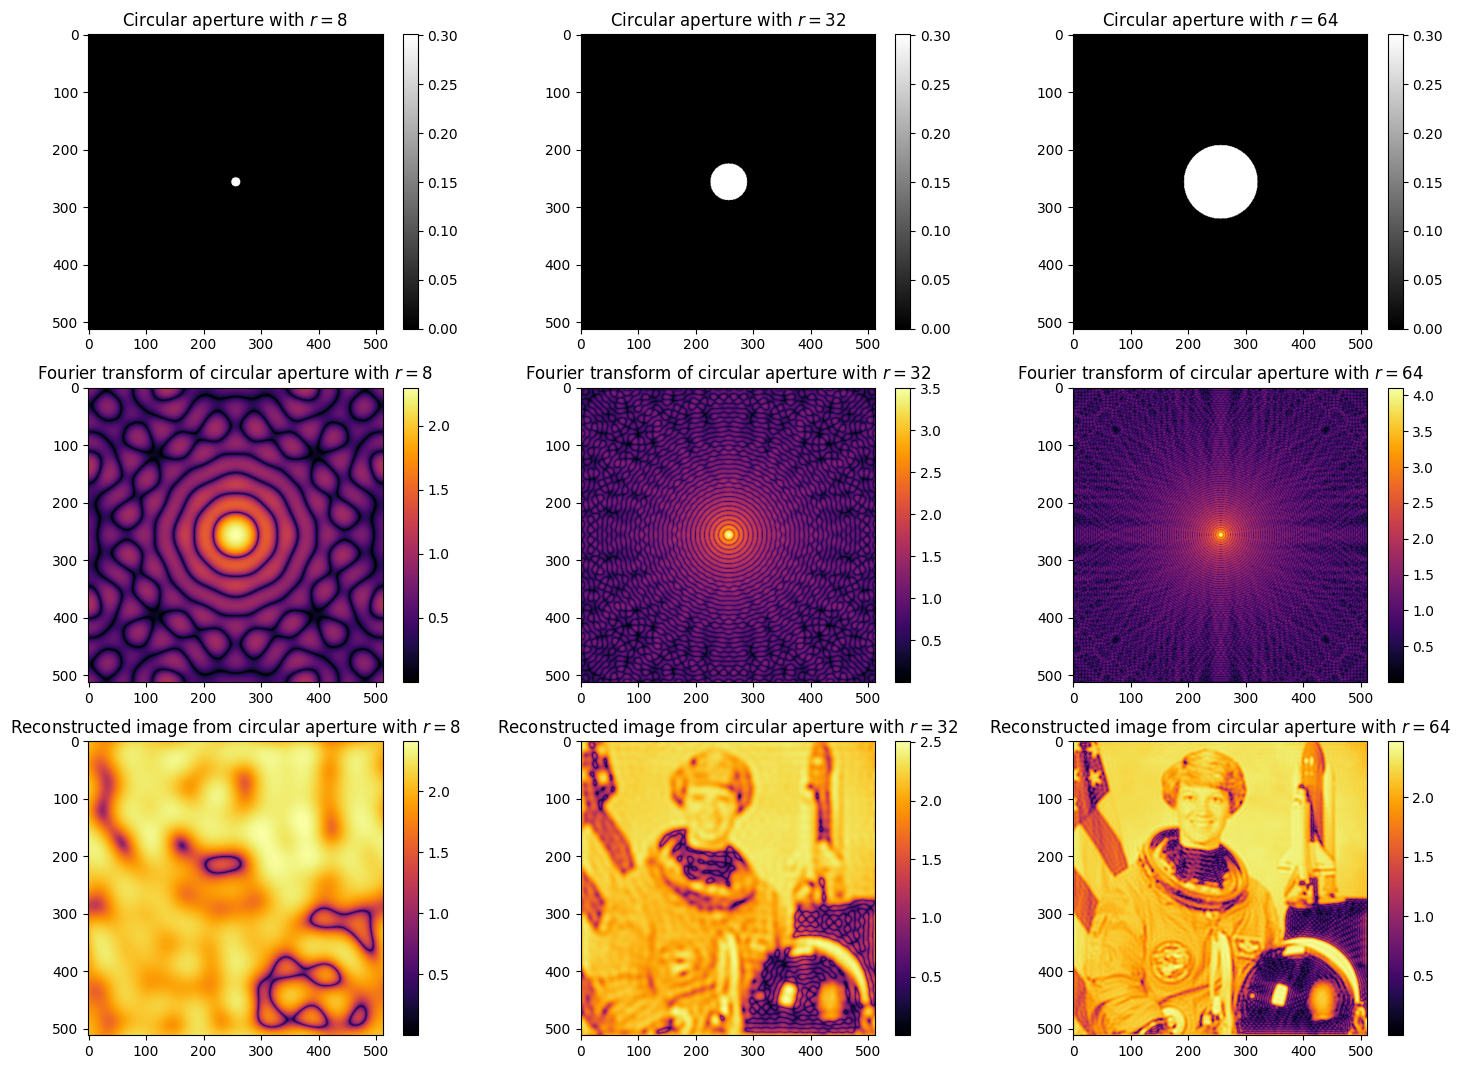

In [10]:
from skimage import io, color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image

#Function to convolve the image and the aperture
def fft(image, aperture):
  return ifft2(fft2(image) * fftshift(aperture))

#Function to visualize the aperture
def aperture_fft(aperture):
  return fftshift(fft2(aperture))

#Generate the circular apertures
c8 = gen_circ(8, 512)
c32 = gen_circ(32, 512)
c64 = gen_circ(64, 512)

#Convolve the original image with the circular apertures
img8 = fft(img, c8)
img32 = fft(img, c32)
img64 = fft(img, c64)

#Display
fig = plt.figure(figsize=(18, 13))
plt.subplot(331)
plt.imshow(np.log10(np.abs(c8) + 1), cmap="gray")
plt.title("Circular aperture with $r = 8$")
plt.colorbar()
plt.subplot(332)
plt.imshow(np.log10(np.abs(c32) + 1), cmap="gray")
plt.title("Circular aperture with $r = 32$")
plt.colorbar()
plt.subplot(333)
plt.imshow(np.log10(np.abs(c64) + 1), cmap="gray")
plt.title("Circular aperture with $r = 64$")
plt.colorbar()
plt.subplot(334)
plt.imshow(np.log10(np.abs(aperture_fft(c8)) + 1), cmap="inferno")
plt.title("Fourier transform of circular aperture with $r = 8$")
plt.colorbar()
plt.subplot(335)
plt.imshow(np.log10(np.abs(aperture_fft(c32)) + 1), cmap="inferno")
plt.title("Fourier transform of circular aperture with $r = 32$")
plt.colorbar()
plt.subplot(336)
plt.imshow(np.log10(np.abs(aperture_fft(c64)) + 1), cmap="inferno")
plt.title("Fourier transform of circular aperture with $r = 64$")
plt.colorbar()
plt.subplot(337)
plt.imshow(np.log10(np.abs(img8) + 1), cmap="inferno")
plt.title("Reconstructed image from circular aperture with $r = 8$")
plt.colorbar()
plt.subplot(338)
plt.imshow(np.log10(np.abs(img32) + 1), cmap="inferno")
plt.title("Reconstructed image from circular aperture with $r = 32$")
plt.colorbar()
plt.subplot(339)
plt.imshow(np.log10(np.abs(img64) + 1), cmap="inferno")
plt.title("Reconstructed image from circular aperture with $r = 64$")
plt.colorbar()

As we can see, the smaller the aperture, the blurier the image becomes. As we increase the aperture size, the image becomes clearer and more details can be observed.

At small apertures, only low frequency signals are kept. From the Fourier transform of the apertures, we can see that larger apertures correspond to higher frequencies. Edges are high-frequency information, since it is a rather abrupt change from one pixel value to another. As a result, edges are only visible in the larger aperture reconstructions, and the smaller aperture reconstructions appear blurry.

#### PART 3 - Correlation *(20 points)*

In this task, we observe using the correlation method that the similarity between two functions can be extracted-- this is also referred to as template matching.

You can get the test and target images from the "Datasets" folder in the course GDrive:
- AP157_moduleB2_correlation_test_image.png (with text "The Rain in Spain Stays Mainly in the Plain")
- AP157_moduleB2_correlation_target_image.png (with text "A")

In the correlation result, the high intensity portions indicate the presence of letter 'A' on the test image.

To get the correlation, you can perform the ff. steps:

- **Compute Fourier Transforms:**
  - Use `fft2` to compute the 2D Fourier Transform of the input test image (`image`).
  - Use `fft2` and `np.conj` to compute the complex conjugate of the 2D Fourier Transform of the target template.

- **Compute Cross-Correlation in Frequency Domain:**
  - Multiply the Fourier Transforms of the image and the complex conjugate of the Fourier Transform of the target template element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the correlation.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the target image, and the correlation result.
  - Add colorbars to each subplot for reference and to visualize intensity levels.

In [11]:
#Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")
file_path = "/content/drive/My Drive/AP157/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Load the images using CV2 instead, since we will resize them later
image = cv2.imread(file_path + 'AP157_moduleB2_correlation_test_image.png')
target = cv2.imread(file_path + 'AP157_moduleB2_correlation_target_image.png')
#Convert from BGR (CV2 default) to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
target = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
# Get the dimensions of the target image
test_height, test_width = image.shape[:2]

# Resize the test image to match the target image's size
target = cv2.resize(target, (test_width, test_height))

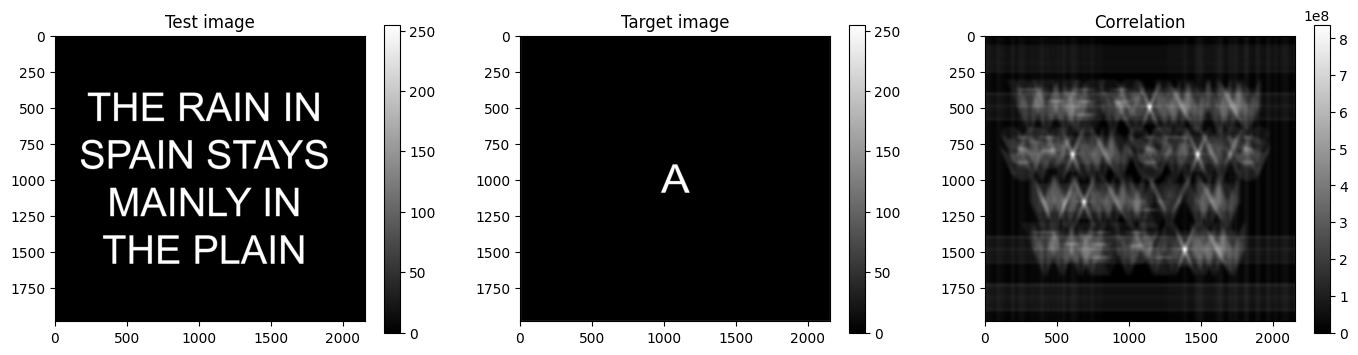

In [13]:
#Take the Fourier transform of the test image
image_fft = fft2(image)
#Take the conjugate of the Fourier transform of the target image
target_fft = np.conj((fft2(target)))
#Find their correlation by taking the element-wise product
correlation = image_fft * target_fft
#Reconstruct the image using inverse Fourier transform then inverse shift
fft_image = ifftshift(ifft2(correlation))

#Display
fig = plt.figure(figsize=(17, 4))
plt.subplot(131)
plt.imshow(image, cmap="gray")
plt.title("Test image")
plt.colorbar()
plt.subplot(132)
plt.imshow(target, cmap="gray")
plt.title("Target image")
plt.colorbar()
plt.subplot(133)
plt.imshow(np.abs(fft_image), cmap="gray")
plt.title("Correlation")
plt.colorbar()

From the correlation image, we can note five peaks:

*   One in the second word of the first line
*   One in the first word of the second line
*   One in the second word of the second line
*   One in the first word of the third line
*   One in the second word of the fourth line

If we refer to the original image, each of these peaks corresponds to the location of the letter "A" in the text. Hence, they matched our target image.
Therefore, each peak in the correlation image denotes the location of a match of our target image.

#### PART 4 - Application: Canvas Weave Modeling and Removal *(30 points)*

Suppose we want to investigate the brush strokes of a painter. However, the texture of the canvas obscures our view of the brushstrokes. Let’s use FFT to remove the canvas weave.

Perform the ff. steps:

1. Open the image AP157_moduleB_canvas_weave_image.jpg (also in the Datasets folder; the image is from a painting by Dr. Vincent Daria.) and convert into a grayscale image. To enhance the detection of repeating patterns we first subtract the mean grayscale from the image. This will remove the DC bias of intensity images.

2. Take the FT of the mean-subtracted image and take note of the symmetric peaks. These are the sinusoids that make up the canvas weave image, similar to the rotation property of sinusoids we did earlier.

3. Manually create a filter mask in the FT space to remove the canvas weave patterns. This is a matrix which is the same size as the image. The filter is all 1’s but are zero at the locations of the sinusoidal peaks. FFT shift this filter and multiply this to the complex FT of the Red, Green and Blue channels of the original image (not mean subtracted). The filter essentially “erases” the peaks. Take the inverse FT of the filtered FT and overlay the filtered R,G,B images. Did the canvas weave vanish enough that the paint and brushstrokes remain?

4. Invert the filter mask (0's become 1's and vice versa) and take the inverse Fourier transform. Observe the generated modulus image. Is it close to the appearance of the canvas weave?

Text(0.5, 1.0, 'Original image')

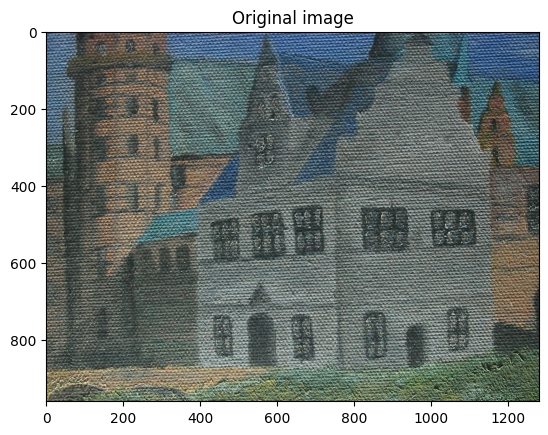

In [14]:
#Import the image
painting = io.imread(file_path + 'AP157_moduleB2_canvas_weave_image.jpg')

#Display
plt.imshow(painting)
plt.title("Original image")

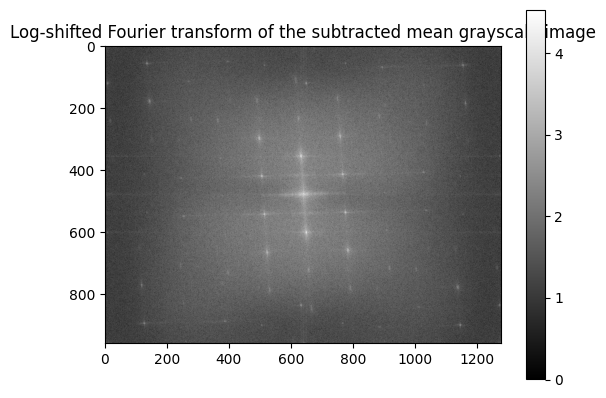

In [15]:
#Convert the image to grayscale
gray = color.rgb2gray(painting)
#Subtract the mean grayscale
img_gs = gray - np.mean(gray)
#Take the log-shifted Fourier transform of the image with the subtracted grayscale
img_gs_fft = np.log10(np.abs(fftshift(fft2(img_gs)))+1)
x, y = img_gs_fft.shape

#Display the mask
plt.imshow(img_gs_fft, cmap="gray")
plt.title("Log-shifted Fourier transform of the subtracted mean grayscale image")
plt.colorbar()

This mask represents our image. The bright peak at the center carries most information in the image. Other bright peaks can be attributed to the main artifact pattern present throughout the image---the texture of the canvas.

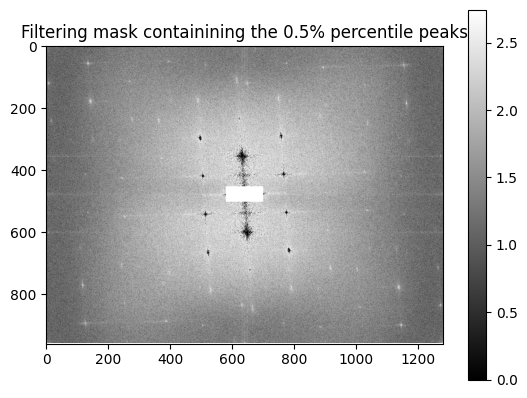

In [16]:
#Find the 0.5% percentile peaks
p1, p99 = np.percentile(img_gs_fft, (0, 99.5))
#At these locations, make the value 0
filter = np.where(img_gs_fft > p99, 0, img_gs_fft)

#Since the bright central point denotes most information on the image, we must mask it out to retain the details we want
#Central region to retain
height = 120
width = 50
#Dimensions of the image
x = 960
y = 1280
#Exclude the central region from the filter
filter[int((x - width)/2):int((x + width)/2), int((y - height)/2):int((y + height)/2)] = np.max(filter)

#Display the mask, with the central region excluded
plt.imshow(filter, cmap="gray")
plt.colorbar()
plt.title("Filtering mask containining the 0.5% percentile peaks")
plt.show()

Text(0.5, 1.0, 'Reconstructed image')

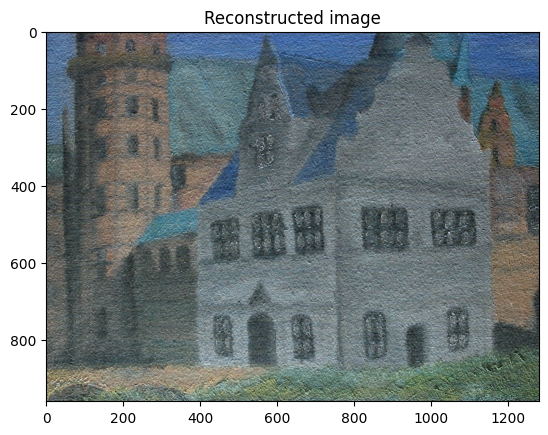

In [17]:
#Fourier shift the filter
filter_shift = fftshift(np.abs(filter))

#Convolve with Red, Green, and Blue Channels
Rd, Gn, Bl = fft2(painting[:, :, 0])*filter_shift, fft2(painting[:, :, 1])*filter_shift, fft2(painting[:, :, 2])*filter_shift
invRd, invGn, invBl = np.abs(ifft2(Rd)), np.abs(ifft2(Gn)), np.abs(ifft2(Bl))

#Normalizing values
norm_inv_R = (invRd - np.min(invRd))/(np.max(invRd) - np.min(invRd))
norm_inv_G = (invGn - np.min(invGn))/(np.max(invGn) - np.min(invGn))
norm_inv_B = (invBl - np.min(invBl))/(np.max(invBl) - np.min(invBl))

#Generate a new image
masked = np.zeros(painting.shape)

masked[:, :, 0] = norm_inv_R
masked[:, :, 1] = norm_inv_G
masked[:, :, 2] = norm_inv_B

#Display
plt.imshow(masked)
plt.title("Reconstructed image")

Using Fourier transform, we were able to extract a particular piece of information from the image. In this case, it was the texture of the canvas of the painting. By subtracting these peaks from the image, we were able to reconstruct a clearer version of the painting.